In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from catboost import CatBoostRegressor

In [2]:
# Load the dataset
dataset = pd.read_csv("/kaggle/input/house-price/HousePricePrediction.xlsx - Sheet1.csv")

In [3]:
# Display the first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [4]:
# Explore the dataset shape
print("Dataset shape:", dataset.shape)

Dataset shape: (2919, 13)


In [5]:
# Identify categorical, integer, and float variables
obj_cols = dataset.select_dtypes(include='object').columns.tolist()
num_cols = dataset.select_dtypes(include=['int', 'float']).columns.tolist()

<Axes: title={'center': 'Number of Unique Values in Categorical Features'}>

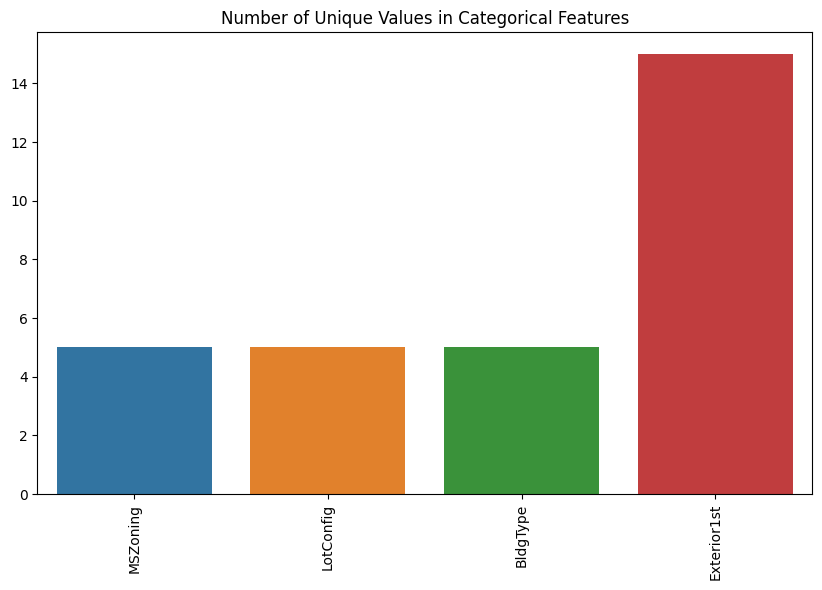

In [6]:
# Display the number of unique values for each categorical feature
unique_values = [dataset[col].nunique() for col in obj_cols]
plt.figure(figsize=(10, 6))
plt.title('Number of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols, y=unique_values)

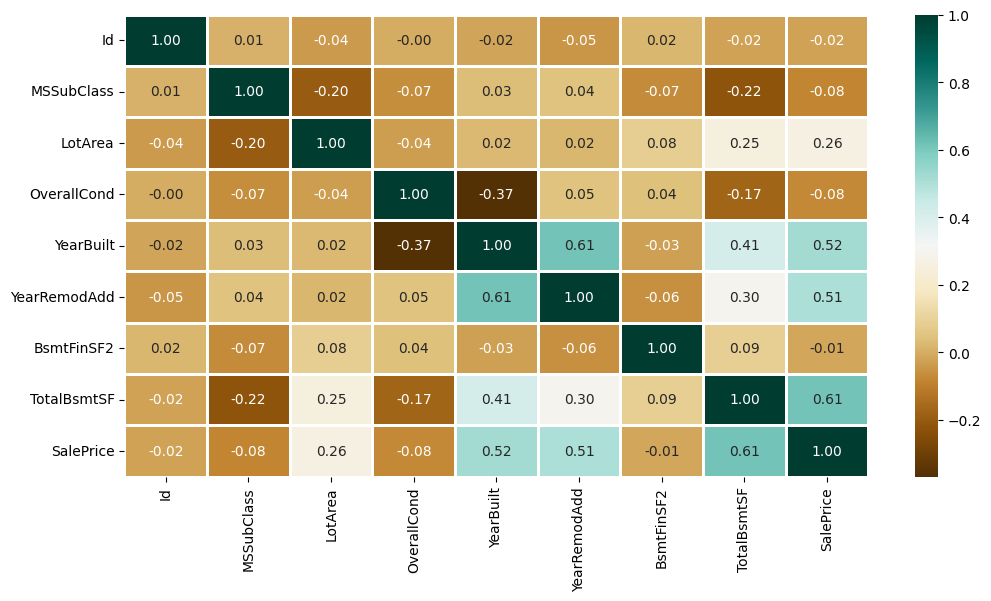

In [7]:
# Visualize the correlation matrix for numeric columns only
plt.figure(figsize=(12, 6))
numeric_dataset = dataset.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)
plt.show()

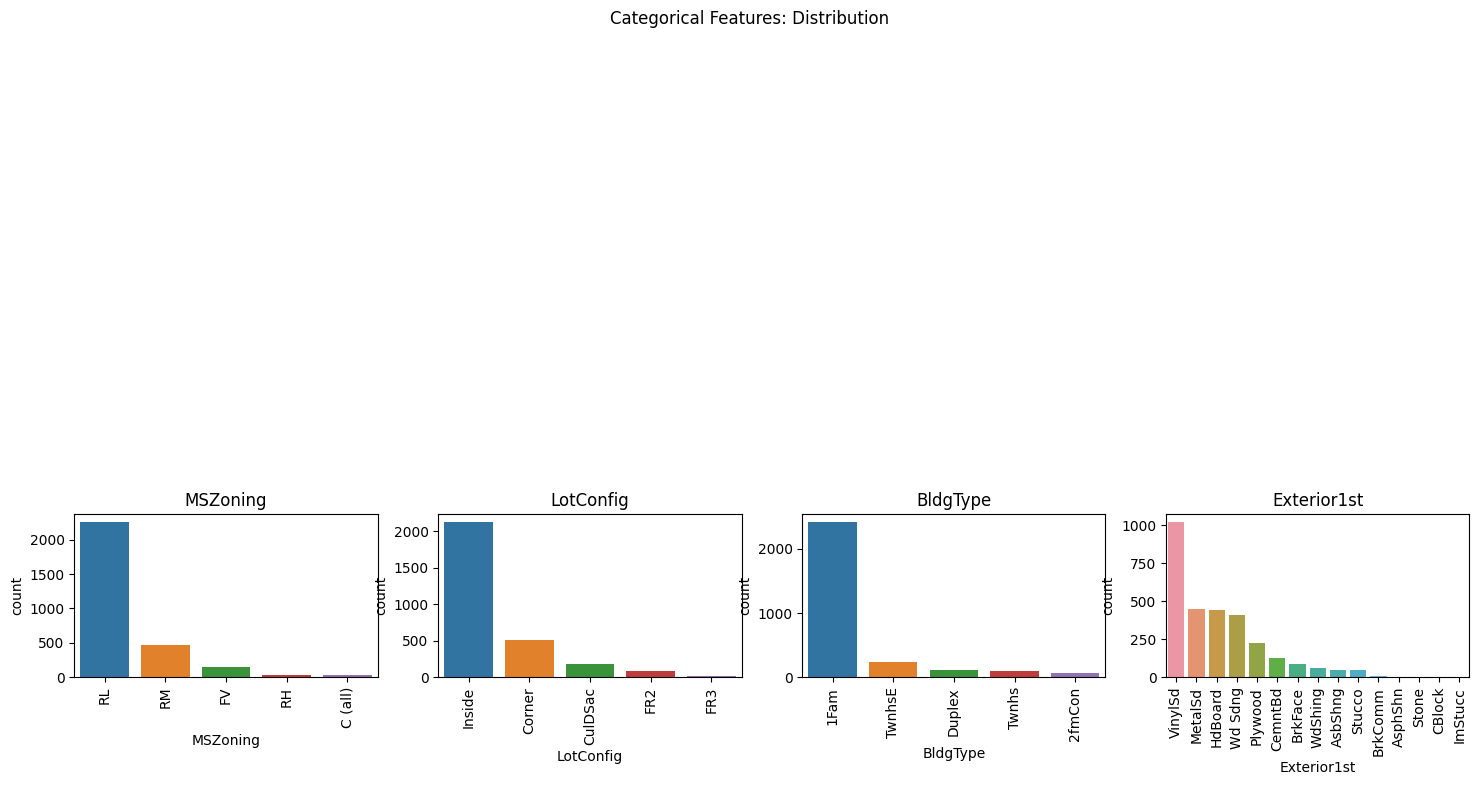

In [8]:
# Visualize the distribution of categorical features
plt.figure(figsize=(18, 36))
plt.suptitle('Categorical Features: Distribution', y=1.02)  # Use suptitle for overall title
plt.subplots_adjust(hspace=0.6)  # Adjust vertical space between subplots
for i, col in enumerate(obj_cols, 1):
    ax = plt.subplot(11, 4, i)
    plt.xticks(rotation=90)
    sns.barplot(x=dataset[col].value_counts().index, y=dataset[col].value_counts(), ax=ax)
    ax.set_title(col)  # Set title for each subplot
plt.show()

In [9]:
# Drop unnecessary columns
dataset.drop(['Id'], axis=1, inplace=True)

In [10]:
# Fill missing values in 'SalePrice' with the mean
dataset['SalePrice'].fillna(dataset['SalePrice'].mean(), inplace=True)

In [11]:
# Drop rows with missing values
new_dataset = dataset.dropna()

In [12]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [13]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [14]:
OH_encoder = OneHotEncoder(sparse_output=False, drop='first')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]), columns=OH_encoder.get_feature_names_out(object_cols))
OH_cols.index = new_dataset.index
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [15]:
# Split the data into features (X) and target variable (Y)
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

In [16]:
# Split the data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [17]:
# Support Vector Regression
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred_SVR = model_SVR.predict(X_valid)
print("SVR Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_SVR))

SVR Mean Absolute Percentage Error: 0.18705129312859367


In [18]:
# Random Forest Regression
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred_RFR = model_RFR.predict(X_valid)
print("Random Forest Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_RFR))

Random Forest Mean Absolute Percentage Error: 0.19380851437310093


In [19]:
# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred_LR = model_LR.predict(X_valid)
print("Linear Regression Mean Absolute Percentage Error:", mean_absolute_percentage_error(Y_valid, Y_pred_LR))

Linear Regression Mean Absolute Percentage Error: 0.1874202546342793


In [20]:
# CatBoost Regression
cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
Y_pred_cb = cb_model.predict(X_valid)
cb_r2_score = r2_score(Y_valid, Y_pred_cb)
print("CatBoost R2 Score:", cb_r2_score)

Learning rate set to 0.046797
0:	learn: 56457.2949544	total: 55ms	remaining: 54.9s
1:	learn: 55742.6356870	total: 56.5ms	remaining: 28.2s
2:	learn: 55172.7754249	total: 57.6ms	remaining: 19.1s
3:	learn: 54541.8295454	total: 58.8ms	remaining: 14.6s
4:	learn: 53877.5587092	total: 60.1ms	remaining: 12s
5:	learn: 53268.2497434	total: 61.2ms	remaining: 10.1s
6:	learn: 52698.9724936	total: 62.5ms	remaining: 8.87s
7:	learn: 52141.4723545	total: 63.6ms	remaining: 7.89s
8:	learn: 51666.1778879	total: 64.8ms	remaining: 7.13s
9:	learn: 51252.1470743	total: 65.9ms	remaining: 6.52s
10:	learn: 50705.6081797	total: 66.9ms	remaining: 6.01s
11:	learn: 50239.3393604	total: 68.1ms	remaining: 5.61s
12:	learn: 49819.8995418	total: 69.2ms	remaining: 5.25s
13:	learn: 49469.9681451	total: 70.4ms	remaining: 4.96s
14:	learn: 49178.7603630	total: 71.9ms	remaining: 4.72s
15:	learn: 48877.3225126	total: 73.3ms	remaining: 4.51s
16:	learn: 48566.5244228	total: 74.5ms	remaining: 4.31s
17:	learn: 48251.1475729	total: 